<a href="https://colab.research.google.com/github/uuuuju/Audio-Data-Augmentation/blob/main/Creating_an_Augmentation_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install audiomentations

     |████████████████████████████████| 67 kB 2.8 MB/s 


In [ ]:
import librosa
import soundfile as sf
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
augment_raw_audio = Compose(
    [
        AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1),
        PitchShift(min_semitones=-8, max_semitones=8, p=1),
        HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=4000, p=1)
    ]
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = "/content/drive/My Drive/053.wav"

In [ ]:
def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveplot(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveplot(augmented_signal, sr=sr, ax=ax[1])
    ax[1].set(title="Augmented signal")
    plt.show()

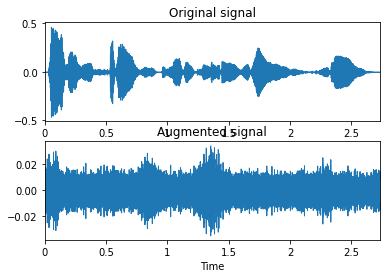

In [ ]:
if __name__ == "__main__":
    signal, sr = librosa.load(file_name)
    augmented_signal = augment_raw_audio(signal, sr)
    sf.write("augmented_audio.wav", augmented_signal, sr)
    _plot_signal_and_augmented_signal(signal, augmented_signal, sr)